# Salaries and Performance in Major League Baseball

We might expect that the salary performance relationship in baseball will be more like the NBA than the EPL, given that the organizational structure has many similarities with the NBA.

We follow the same steps as we did for both those leagues.

In [1]:
%%capture
# As usual, we begin by loading the packages we will need
# The following statements are to resolve version mismatches that exist 
# with this current image, if your R-squared values differ from what is
# expected, then these lines should fix it.

import sys
'''
!{sys.executable} -m pip uninstall statsmodels --yes
!{sys.executable} -m pip uninstall numpy --yes
!{sys.executable} -m pip install numpy==1.16.5
!{sys.executable} -m pip install statsmodels==0.10.1
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Now we load the data

MLB=pd.read_excel("D:\\GitHub\\Coursera\\SportsPerformanceAnalytics\\FoundationsofSportsAnalytics_DataRepresentationanModelsinSports\\data\\Week5\\MLB pay and performance.xlsx")

In [3]:
MLB.describe()

,season,salaries,wpc,G,W
count,918.000000,9.180000e+02,918.000000,918.000000,918.000000
mean,2000.978214,6.004263e+07,0.499844,159.932462,79.943355
std,9.135570,4.330992e+07,0.068669,8.675654,11.840224
min,1985.000000,8.800000e+05,0.265432,112.000000,43.000000
25%,1993.000000,2.543571e+07,0.450617,162.000000,71.250000
50%,2001.000000,5.053732e+07,0.500000,162.000000,80.000000
75%,2009.000000,8.441608e+07,0.549383,162.000000,89.000000
max,2016.000000,2.319789e+08,0.716049,164.000000,116.000000


In [4]:
MLB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    918 non-null    int64  
 1   Team      918 non-null    object 
 2   lgID      918 non-null    object 
 3   salaries  918 non-null    int64  
 4   wpc       918 non-null    float64
 5   G         918 non-null    int64  
 6   W         918 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 50.3+ KB


We can see that we have 918 observations in total covering the seasons 1985 to 2016. This data covers even more years than our NBA or EPL data, and therefore we would expect the effect of salary inflation to be even greater. We can see that when we measure the total expenditure on salaries by season:

In [5]:
Sumsal = MLB.groupby(['season'])['salaries'].sum().reset_index().rename(columns={'salaries':'allsal'})
Sumsal

,season,allsal
0,1985,261964696
1,1986,307854518
2,1987,272575375
3,1988,300452424
4,1989,359995711
5,1990,443881193
6,1991,613048418
7,1992,805543323
8,1993,901740134
9,1994,927836287


In 1985, the total salaries paid out by MLB teams amounted to \\$262 million and by 2016 this had risen to $3750 million. As with the NBA and EPL, this does not reflect improvements in player quality, but rather the growth of revenues of MLB and the capacity of players to bargain for a significant share of these revenues.

We now merge these totals into our original dataset. 

In [6]:
MLB = pd.merge(MLB, Sumsal, on=['season'], how='left')
display(MLB)

,season,Team,lgID,salaries,wpc,G,W,allsal
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313
...,...,...,...,...,...,...,...,...
913,2012,WAS,NL,80855143,0.604938,162,98,2932741192
914,2013,WAS,NL,113703270,0.530864,162,86,3034525648
915,2014,WAS,NL,131983680,0.592593,162,96,3192317623
916,2015,WAS,NL,155587472,0.512346,162,83,3514142569


In [7]:
# we now create the relsal variable for MLB

MLB['relsal']= MLB['salaries']/MLB['allsal']

In [8]:
# This command enables us to inspect all rows in the data, not just a subset

pd.set_option('display.max_rows', None)
MLB

,season,Team,lgID,salaries,wpc,G,W,allsal,relsal
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885,0.027620
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871,0.032294
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750,0.037068
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102,0.030888
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313,0.024244
5,2002,ANA,AL,61721667,0.611111,162,99,2024077522,0.030494
6,2003,ANA,AL,79031667,0.475309,162,77,2128262128,0.037134
7,2004,ANA,AL,100534667,0.567901,162,92,2070665943,0.048552
8,1998,ARI,NL,32347000,0.401235,162,65,1278282871,0.025305
9,1999,ARI,NL,68703999,0.617284,162,100,1494228750,0.045980


Before running a regression, we use sns.reglot() to look at the relationship between salaries and win percentage on a chart.

<AxesSubplot:xlabel='relsal', ylabel='wpc'>

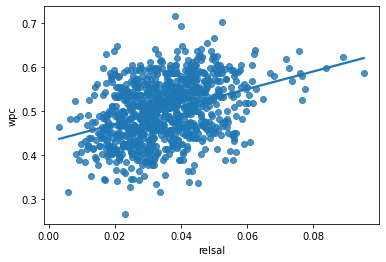

In [9]:
sns.regplot(x="relsal", y="wpc", data = MLB, ci=False)

The chart shows a positive relationship between win percentage and relsal.

The size of the dots, which each represent a single team in a single season, is too large for the scatter to be clearly visible. We can change the size of the dots in regplot using the command "scatter_kws={'s':3}".

<AxesSubplot:xlabel='relsal', ylabel='wpc'>

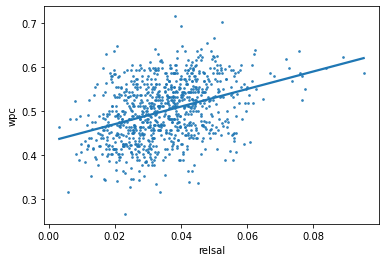

In [10]:
sns.regplot(x="relsal", y="wpc", data = MLB, scatter_kws={'s':3}, ci=False)

While there are some outliers, the relsal variable on the x axis for most teams lies between 0.01 (1%) and a little over .06 (6%). Win percentage on the y axis for most teams lies between 0.33 and 0.66. 

We now run a regression using smf.ols() in order to derive the coefficients of the regression and other diagnostic statistics.

In [11]:
wpcsal1_lm = smf.ols(formula = 'wpc ~ relsal', data=MLB).fit()
print(wpcsal1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           1.94e-30
Time:                        10:20:40   Log-Likelihood:                 1222.7
No. Observations:                 918   AIC:                            -2441.
Df Residuals:                     916   BIC:                            -2432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4301      0.006     68.965      0.0

As with the NBA, we find that the coefficient on relsal is highly significant, but the size of our initial estimate is much smaller- recall that for the NBA the value was 11.3 - nearly six times larger than the coefficient for relsal in MLB. As an initial evaluation we can conclude that the amount of money to outperform your rivals is higher for MLB than than the NBA. Note also that the R-squared (0.134) is a little smaller than the one we found for the NBA (0.172), but not by that much. This suggests that win percentage can buy you success as reliably as it can in the NBA, it's just that you need to spend a mot more (relative to your rivals).



## Self test

Based on this model, what would be the win percentage of a team for whom the value of relsal was 4%?

Recall that we asked the same question when looking at the NBA. Compare you two answers. What do you think explains the difference?

Let's now see if the addition of the lagged dependent variable changes our relsal estimate.

In [12]:
# first we sort the values

MLB.sort_values(by=['Team','season'], ascending=True)

,season,Team,lgID,salaries,wpc,G,W,allsal,relsal
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885,0.027620
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871,0.032294
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750,0.037068
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102,0.030888
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313,0.024244
5,2002,ANA,AL,61721667,0.611111,162,99,2024077522,0.030494
6,2003,ANA,AL,79031667,0.475309,162,77,2128262128,0.037134
7,2004,ANA,AL,100534667,0.567901,162,92,2070665943,0.048552
8,1998,ARI,NL,32347000,0.401235,162,65,1278282871,0.025305
9,1999,ARI,NL,68703999,0.617284,162,100,1494228750,0.045980


In [13]:
# this will allow us to inspect all rows in the data

pd.set_option('display.max_rows', 1000)
MLB

,season,Team,lgID,salaries,wpc,G,W,allsal,relsal
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885,0.027620
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871,0.032294
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750,0.037068
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102,0.030888
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313,0.024244
5,2002,ANA,AL,61721667,0.611111,162,99,2024077522,0.030494
6,2003,ANA,AL,79031667,0.475309,162,77,2128262128,0.037134
7,2004,ANA,AL,100534667,0.567901,162,92,2070665943,0.048552
8,1998,ARI,NL,32347000,0.401235,162,65,1278282871,0.025305
9,1999,ARI,NL,68703999,0.617284,162,100,1494228750,0.045980


In [14]:
# now we create the lagged dependend variable

MLB['wpc_lag'] = MLB.groupby('Team')['wpc'].shift(1)
MLB

,season,Team,lgID,salaries,wpc,G,W,allsal,relsal,wpc_lag
0,1997,ANA,AL,31135472,0.518519,162,84,1127285885,0.027620,NaN
1,1998,ANA,AL,41281000,0.524691,162,85,1278282871,0.032294,0.518519
2,1999,ANA,AL,55388166,0.432099,162,70,1494228750,0.037068,0.524691
3,2000,ANA,AL,51464167,0.506173,162,82,1666135102,0.030888,0.432099
4,2001,ANA,AL,47535167,0.462963,162,75,1960663313,0.024244,0.506173
5,2002,ANA,AL,61721667,0.611111,162,99,2024077522,0.030494,0.462963
6,2003,ANA,AL,79031667,0.475309,162,77,2128262128,0.037134,0.611111
7,2004,ANA,AL,100534667,0.567901,162,92,2070665943,0.048552,0.475309
8,1998,ARI,NL,32347000,0.401235,162,65,1278282871,0.025305,NaN
9,1999,ARI,NL,68703999,0.617284,162,100,1494228750,0.045980,0.401235


We now run our regression again, but adding wpc_lag into the regression equation:

In [15]:
wpcsal2_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal', data=MLB).fit()
print(wpcsal2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           9.68e-52
Time:                        10:22:16   Log-Likelihood:                 1235.0
No. Observations:                 883   AIC:                            -2464.
Df Residuals:                     880   BIC:                            -2450.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2839      0.015     19.093      0.0

The lagged dependent variable here is much smaller than it was in the case of the NBA (0.6), which implies that last year's performance matters much less in determining this year's performance. There could be several reasons for this, e,g, greater player turnover in MLB, or a lower probability that player's from last year will be repeated in the current year.

As was the case with the NBA, the addition of the lagged dependent variable has reduced the size of the coefficient for relsal, halving it, but still this is not as dramatic as the reduction in the NBA case, where the variable also became statistically insignificant, which is not the case here. The R-squared has not risen as much either.

Overall, however, we can conclude that adding the lagged dependent variable has reduced the possibility of omitted variable bias.

## Self test

The model implies that win percentage of a team in year t, wpc(t) = 0.2839 +0.3614 x wpc_lag + 1.0259 x relsal

Suppose relsal is 4% (0.04), calculate the value of wpc(t) if wpc(t-1) equals (a) 0.6 and (b) 0.4. How do you account for your answer?


Now we add the fixed effects to the regression:

In [16]:
wpcsal3_lm = smf.ols(formula = 'wpc ~wpc_lag + relsal +C(Team)', data=MLB).fit()
print(wpcsal3_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    wpc   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     8.401
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.02e-36
Time:                        10:24:13   Log-Likelihood:                 1252.0
No. Observations:                 883   AIC:                            -2430.
Df Residuals:                     846   BIC:                            -2253.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3224      0.028     11.

The result here is a very sharp contrast to the NBA model, where a number of the fixed effects were statistically significant; for MLB, none of them are. 

When you add variables that are not statistically significant, it is logical that the R-squared will not go up very much, since you are not explaining very much. That is the case here, where the R-squared increases to only 0.26. 

You may have noticed that under the R-squared is "Adj. R-squared" - where "adj." is short for "adjusted". This is useful to consider in this case. A simple fact about regression is that when you add variables, no matter if they are irrelevant, then you will increase the *unadjusted* R-squared. This is a consequence of the underlying algebra. We are trying to reproduce the relationship between a set of points, using a linear model, which is just an equation that produces another set of points. The closer the two sets of points, the better the model. But in the end, we could reproduce the original set of points by copying them - and in the algebra of regression this would mean providing a separate variable for each point. For example, in this regression we have 883 observations - and so if we had 883 variables in our regression we would fit the data exactly and the R-squared would be 1.0! Note that this would be true even if the variables had no logical connection with our data. The upshot of this is that adding variables increases R-squared, regardless of whether the variables really explain the data any better. Adjusted R-squared is an attempt to compensate for this effect, by reducing the value of R-squared as the number of variables in the regression increases. If the variables are statistically significant, then adjusted R-squared can still increase, but in this case we can see that with the addition of the fixed effects, adjusted R-squared has in fact fallen from 0.233 to 0.232. This is a strong suggestion that we should ignore the fixed effects.

The conclusion of this is that our second model, with just relsal and the lagged dependent variable, was our best model.

What is the impact of spending and performance in this model?

Our preferred regression model is wpc(t) = 0.284 + 0.361 x wpc(t-1) + 1.026 x relsal (t), where t refers to the season.

To work out the impact of relsal we need to eliminate the the lagged dependent variable from the equation, which we do by assuming a "steady state"- where wpc(t) = wpc(t-1). If this were the case then we would have

wpc = 1/(1-0.361) x (0.284 + 1.026 x relsal)

We can then work out these values of win percentage for very low relsal (0.01), average relsal (0.035) and very high relsal (0.06):

In [17]:
print(1/(1-0.361)*(0.284 + 1.026*.01))
print(1/(1-0.361)*(0.284 + 1.026*.035))
print(1/(1-0.361)*(0.284 + 1.026*.06))


0.4605007824726134
0.500641627543036
0.5407824726134585


## Self test

Suppose, as for the NBA, the value of the lagged dependent variable was 0.6. Use that value instead of 0.361 in the above equations. What difference does it make? Can you explain why?

The results suggest that while it is possible to buy success in MLB by increasing spending relative to your competitors, it is not that easy to do so. Even the very highest spending does not deliver a dominant performance. This might be a disappointment for those who think markets ought to work perfectly, but on the other hand, we would suggest, this is good news for baseball fans.

# Conclusion

The case of MLB has much more in common with the NBA than the EPL because of similarities of the league systems. We ran essentially the same models as we did for the NBA, but we also identified a number of differences. Comparing with the NBA, we found that the lagged dependent variable was less important and all of the fixed effects were insignficant. Given our main focus was on relsal, we found that in MLB win percentage was notably less sensitive the relative wage spending than the NBA.

We conclude this week by looking at one more league that operates under the North American model, the National Hockey League (NHL).